In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud
from imageio import imread
from tkinter import _flatten

## 数据读取

In [4]:
df1 = pd.concat([pd.read_excel('data/2018-2019茂名（含自媒体）.xlsx', sheet_name='游记攻略'), pd.read_excel('data/2020-2021茂名（含自媒体）.xlsx', sheet_name='游记攻略')], ignore_index=True)
df2 = pd.concat([pd.read_excel('data/2018-2019茂名（含自媒体）.xlsx', sheet_name='酒店评论'), pd.read_excel('data/2020-2021茂名（含自媒体）.xlsx', sheet_name='酒店评论')], ignore_index=True)
df3 = pd.concat([pd.read_excel('data/2018-2019茂名（含自媒体）.xlsx', sheet_name='景区评论'), pd.read_excel('data/2020-2021茂名（含自媒体）.xlsx', sheet_name='景区评论')], ignore_index=True)
df4 = pd.concat([pd.read_excel('data/2018-2019茂名（含自媒体）.xlsx', sheet_name='餐饮评论'), pd.read_excel('data/2020-2021茂名（含自媒体）.xlsx', sheet_name='餐饮评论')], ignore_index=True)
df5 = pd.concat([pd.read_excel('data/2018-2019茂名（含自媒体）.xlsx', sheet_name='微信公众号新闻'), pd.read_excel('data/2020-2021茂名（含自媒体）.xlsx', sheet_name='微信公众号新闻')],ignore_index=True)

## 文本分词

### 停用词

In [5]:
# 停用词
with open('data/stopword.txt', encoding='utf-8') as fp:
    words = fp.readlines()
    stopwords = [s.replace('\n', '').strip() for s in words] + ['\n', ' ', '茂名', '茂名市', '广东', '广东省', '中国',
                '国家', '全国',]

### 分词

In [26]:
cut_vx = df5['正文'].apply(jieba.lcut)
cut_stop = cut_vx.apply(lambda ws: [w for w in ws if w not in stopwords or len(w) != 1])
cut_stop

0       [2017, 旅程, 已经, 结束, 2018, 未来, 拉开, 帷幕, 新, 一年, 里,...
1       [距离, 春节, 还有, 一个多月, 时间, 在线, 旅游, 网站, 春节, 机票, 销售,...
2       [960, 万平方公里, 祖国, 大地, 四季, 独特, 美景, 冬天, 旅行, 一番, 风...
3       [长, 二维码, 关注, 我们, 中心, 联系人, 林小姐, 13709649096, 刘小...
4                                                      []
                              ...                        
6281    [由市, 创文, 巩卫办, 市, 教育局, 联合, 主办, 小手, 拉大, 手, 文明, 随...
6282    [重要, 论述, 1984, 年, 10, 31, 邓小平, 会见, 缅甸, 总统, 缅甸,...
6283    [近日, 农业, 农村部, 官网, 公布, 第二批, 全国, 乡村, 治理, 示范, 村镇,...
6284    [由市, 创文, 巩卫办, 市, 教育局, 联合, 主办, 小手, 拉大, 手, 文明, 随...
6285    [重要, 论述, 1984, 年, 10, 31, 邓小平, 会见, 缅甸, 总统, 缅甸,...
Name: 正文, Length: 6286, dtype: object

In [27]:
df1['评论内容'] = df1['正文']
df_other = pd.DataFrame(pd.concat([df1.loc[:, '评论内容'], df2.loc[:, '评论内容'], df3.loc[:, '评论内容'], df4.loc[:, '评论内容']]))
df_other.reset_index(drop=True, inplace=True)
cut_other = df_other['评论内容'].apply(jieba.lcut)
cut_stop2 = cut_other.apply(lambda ws: [w for w in ws if w not in stopwords or len(w) != 1])
cut_stop2

0       [茂名, 放鸡岛, 放鸡岛, 原名, 湾, 舟岛, 又名, 汾洲岛, 位于, 广东, 省, ...
1       [茂名, 茂名, 位于, 广东, 西部, 简称, 粤西, 很多, 知道, 茂名, 所以, 介...
2       [行程, 总览, 地点, 茂名, 时间, 天, 实际, 游玩, 时间, 约, 天半, 交通,...
3       [前言, 几分钟, 真的, 吃, 不遍, 茂名, 题目, 只是, 一个, 噱头, 🔥, 🔥,...
4       [茂名, 原本, 相对, 广州, 而言, 交通, 稍差, 适合, 周末, 二日游, 随着, ...
                              ...                        
9569                              [吃, 用餐, 感觉, 下次, 还会, 继续]
9570                                    [回头客, 高州, 喜欢, 这里]
9571                                                 [好吃]
9572                                                 [非常]
9573                                              [好吃, 吃]
Name: 评论内容, Length: 9574, dtype: object

## 词频统计

In [31]:
vx_wc = pd.Series(_flatten(list(cut_stop))).value_counts()
df_vx = pd.DataFrame(vx_wc)
df_vx.head(20)

,0
茂名,50920
工作,16607
发展,15309
旅游,14785
年,12649
茂名市,11864
发布,11738
建设,10909
文化,9618
活动,8881


In [32]:
other_wc = pd.Series(_flatten(list(cut_stop2))).value_counts()
df_other = pd.DataFrame(other_wc)
df_other.head(20)

,0
不错,3114
吃,2477
好吃,2476
可以,1876
环境,1764
味道,1688
服务,1605
茂名,1523
2019,1499
cn,1485


In [37]:
def wordcloud_show(word_count):
    plt.figure(figsize=(20,10))
    pic = imread('data/tuoyaunxing.png')
    w_c = WordCloud(font_path='STKAITI.TTF',
                    background_color='white',
                    mask=pic, max_font_size=80, margin=1
                    )
    wc = w_c.fit_words(word_count)
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')

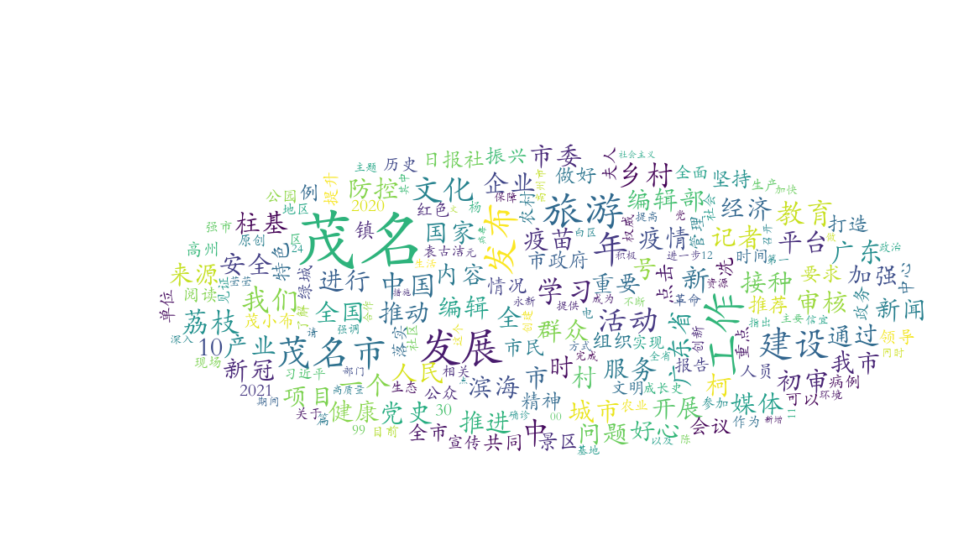

In [39]:
wordcloud_show(vx_wc)

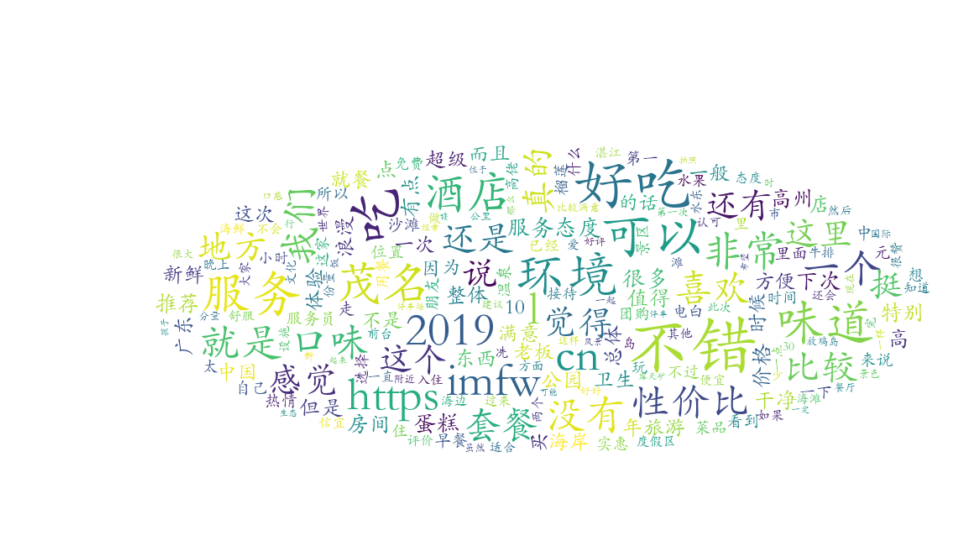

In [40]:
wordcloud_show(other_wc)